In [7]:
%matplotlib inline

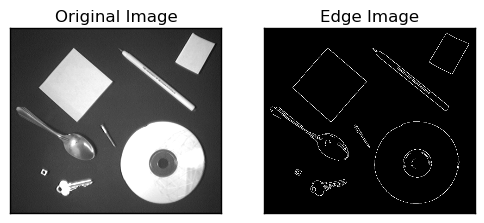

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('line1.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
import numpy as np
import math

def binsearch(lst, x):
    s = 0
    f = len(lst) - 1
    while s < f:
        m = (s + f) // 2
        if lst[m] >= x:
            f = m
        else:
            s = m + 1
    return s
            
def houghlines(img, accuracy=40):
    r_limit = int((img.shape[0] ** 2 + img.shape[1] ** 2) ** 0.5)
    r_list = np.linspace(-r_limit, r_limit, 1600)
    f_list = np.linspace(-math.pi / 2, math.pi / 2, 180)
    cnt = np.zeros((len(r_list), len(f_list)))
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            if img[x][y] == 255:
                for f_ind in range(len(f_list)):
                    f = f_list[f_ind]
                    val = y * math.sin(f) + x * math.cos(f)
                    lower_bound = binsearch(r_list, val - accuracy)
                    upper_bound = binsearch(r_list, val + accuracy)
                    for r_ind in range(lower_bound, upper_bound):
                        cnt[r_ind][f_ind] += 1 
    return cnt, f_list, r_list

In [23]:
a, b, c = houghlines(edges)

In [24]:
a

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

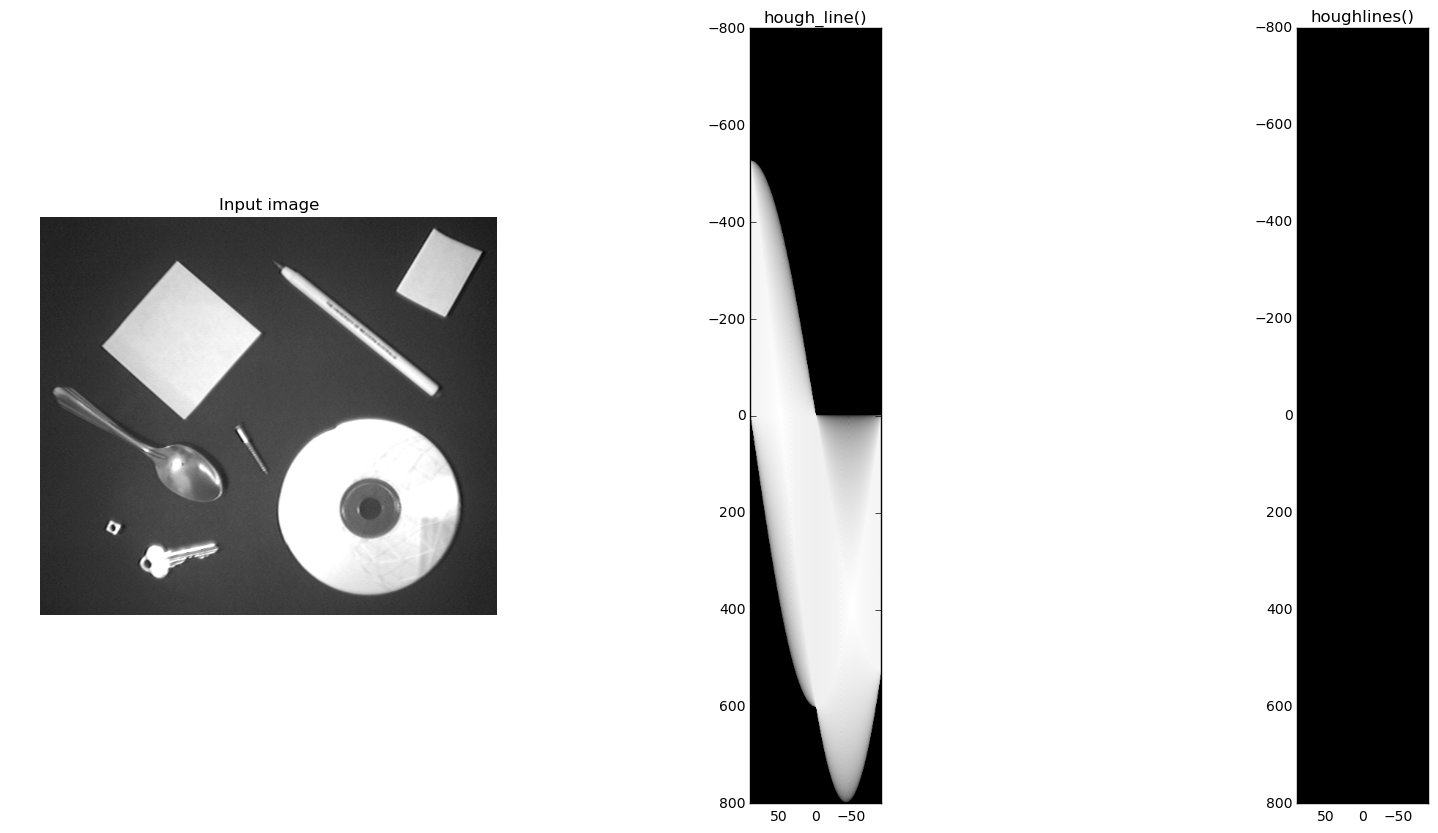

In [11]:
from skimage.transform import hough_line

h, theta, d = hough_line(img)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

ax2.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)
ax2.set_title('hough_line()')

h_my, theta_my, d_my = houghlines(edges)

ax3.imshow(np.log(1 + h_my),
             extent=[np.rad2deg(theta_my[-1]), np.rad2deg(theta_my[0]),
                     d_my[-1], d_my[0]],
             cmap=plt.cm.gray, aspect=1/1.5)
ax3.set_title('houghlines()')

In [104]:
from numpy import unravel_index
r_opt, f_opt = unravel_index(h_my.argmax(), h_my.shape)
print(r_opt, f_opt)
r_opt -= 800
f_opt -= 90
f_opt = f_opt * math.pi / 180
print(r_opt, f_opt)

(1007, 69)
(207, -0.36651914291880922)


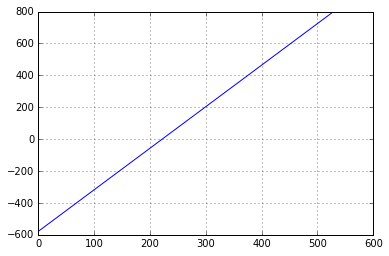

In [105]:
t = np.arange(img.shape[0])
f = np.vectorize(lambda x: (r_opt - x * math.cos(f_opt)) * 1.0 / math.sin(f_opt))
s = f(t)
plt.plot(t, s)

plt.grid(True)
plt.show()

In [97]:
s[0] * math.sin(f_opt)

207.0